In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Kepler's Third Law

The file called `exoplanets.csv` contains orbital and physical parameters for 2950 exoplanets.

In [2]:
# If the file is not present, download the file from the internet and save it in the working directory
import os
import urllib.request as url
if not os.path.isfile("exoplanets.csv"):
    url.urlretrieve("http://www.pitt.edu/~djn23/phys1321/exoplanets.csv", "exoplanets.csv")

Load the data from this file. The data is organized into three columns:
1. MSTAR (the mass of the planet's star)
2. A (the semi-major axis of the planet's orbit)
3. PER (the period of the planet's orbit)

Numpy's genfromtxt is used to read the data, as it replaces missing data with "NaN", which will automatically ignored when the data is plotted later.

The next goal is to verify Kepler's 3rd Law, which states that
$$T^2\propto\frac{a^3}{M}\,,$$
where $T$ is the period of the orbit, $a$ is the semimajor axis, and $M$ is the mass of the *star*. The proportionality constant is equal to 1 if the units of period are in years, the semi-major axis is in AU (astronomical units), and the mass of the star is in units of solar masses.


This can be done by making a simple scatter plot of $a^3/M$ versus $T^2$. Only values of $T$ less than 20 years will be considered in order to reduce the number of data points needed to be plotted.

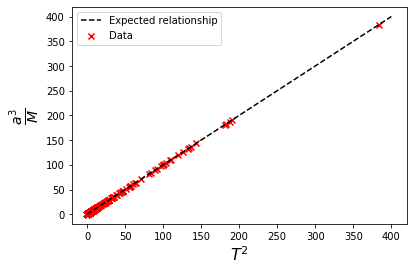

In [16]:
# We are aware of the presence of NaNs in the array
# and they are going to be handled by matplotlib, 
# so we can safely ignore the warning for NaNs
np.seterr(invalid="ignore")

"""
After the first two lines, all of the data for each object is contained 
on one line separated by commas, starting with the name of the object.
Therefore, we want to extract the second, third, and fourth item on each
line, which will be MSTAR, A, and PER respectively.
"""
mstar = np.array([])
A = np.array([])
period = np.array([])
data = np.genfromtxt("exoplanets.csv", skip_header = 2, delimiter = ',')

for line in data:
    line[3] /= 365    # convert days to years for proportionality constant of 1
    if line[3] < 20:    # only want periods less than 20 years
        mstar = np.append(mstar, line[1])
        A = np.append(A, line[2])
        period = np.append(period, line[3])

y_axis = (A**3)/mstar

plt.scatter(np.square(period), y_axis, color = 'r', marker = 'x', label = 'Data')
# plot the line y = x
plt.plot(np.linspace(0, 400, 100), np.linspace(0, 400, 100), 'k--', label = 'Expected relationship')
plt.xlabel("${T^{2}}$", fontsize = 16)
plt.ylabel("$\\frac{a^{3}}{M}$", fontsize = 20)
plt.legend()
plt.show()

As is evident by the plot, the two data sets follow a linear relation, verifying the proportionality proposed by Kepler's Third Law.